In [14]:
from __future__ import division
from __future__ import unicode_literals
from __future__ import absolute_import
import pandas as pd
import numpy as np

import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
#from rdkit.Avalon.pyAvalonTools import GetAvalonFP
import rdkit.rdBase
from rdkit.Chem.MACCSkeys import GenMACCSKeys
from rdkit import DataStructs
from rdkit.DataStructs import BitVectToText
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit import DataStructs
from rdkit.Chem import MCS as MCS
from rdkit.Chem import Descriptors as Descriptors
from rdkit.Chem.EState import Fingerprinter
from rdkit.ML.Descriptors import MoleculeDescriptors
import pandas as pd 
from rdkit.Chem import PandasTools as PandasTools
from rdkit.Chem import Descriptors as Descriptors

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy import stats

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from rdkit.Chem import DataStructs
from sklearn import datasets, linear_model
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV


In [16]:
cmax_data = pd.read_csv("Cmax_processed_old.csv.gz")
cmax_data

,SMILES,median pMolar total plasma concentration,median pMolar unbound plasma concentration,Standardized_SMILES,Standardized_InChI
0,C#CC(O)(/C=C/Cl)CC,4.257078,NaN,C#CC(O)(C=CCl)CC,"InChI=1S/C7H9ClO/c1-3-7(9,4-2)5-6-8/h1,5-6,9H,..."
1,C#CC1(OC(N)=O)CCCCC1,4.223262,NaN,C#CC1(OC(N)=O)CCCCC1,InChI=1S/C9H13NO2/c1-2-9(12-8(10)11)6-4-3-5-7-...
2,C#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=Cc5oncc5C[C@]4(...,6.227192,NaN,C#CC1(O)CCC2C3CCC4=Cc5oncc5CC4(C)C3CCC21C,InChI=1S/C22H27NO2/c1-4-22(24)10-8-18-16-6-5-1...
3,C(=C/c1ccccc1)\CN1CCN(C(c2ccccc2)c2ccccc2)CC1,6.047947,NaN,C(=Cc1ccccc1)C[NH+]1CC[NH+](C(c2ccccc2)c2ccccc...,InChI=1S/C26H28N2/c1-4-11-23(12-5-1)13-10-18-2...
4,C/C=C/C[C@@H](C)[C@@H](O)[C@H]1C(=O)N[C@@H](CC...,6.111649,7.279140,CC=CCC(C)C(O)C1C(=O)NC(CC)C(=O)[NH+](C)CC(=O)[...,InChI=1S/C62H111N11O12/c1-25-27-28-40(15)52(75...
...,...,...,...,...,...
753,Oc1nc(O)c2cn[nH]c2n1,4.006067,NaN,O=c1[n-]c(=O)c2c[n-]nc2[n-]1,InChI=1S/C5H3N4O2/c10-4-2-1-6-9-3(2)7-5(11)8-4...
754,Oc1ncnc2[nH]ncc12,3.855136,3.868365,O=c1[n-]cnc2[n-]ncc12,InChI=1S/C5H3N4O/c10-5-3-1-8-9-4(3)6-2-7-5/h1-...
755,Sc1ncnc2nc[nH]c12,6.483388,6.553969,S=c1[n-]cnc2[n-]cnc12,InChI=1S/C5H3N4S/c10-5-3-4(7-1-6-3)8-2-9-5/h1-...
756,c1ccc([C@H]2CN3CCSC3=N2)cc1,5.459929,NaN,c1ccc(C2CN3CCSC3=[NH+]2)cc1,InChI=1S/C11H12N2S/c1-2-4-9(5-3-1)10-8-13-6-7-...


In [17]:
from rdkit import Chem
from rdkit.Chem import Descriptors

# Assuming you have a DataFrame 'df' with a column 'smiles' for SMILES strings

# Initialize counters for each criterion
counters = {
    'invalid_smiles': 0,
    'no_carbon': 0,
    'is_mixture': 0,
    'contains_metals': 0,
    'above_mw_threshold': 0
}

# Function to check exclusion criteria and update counters
def check_criteria(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:
            counters['invalid_smiles'] += 1
            return False
        if not mol.HasSubstructMatch(Chem.MolFromSmarts('C')):
            counters['no_carbon'] += 1
            return False
        if mol.GetNumAtoms() != Chem.GetMolFrags(mol, asMols=True, sanitizeFrags=False)[0].GetNumAtoms():
            counters['is_mixture'] += 1
            return False
        if any(atom.GetSymbol().isupper() and atom.GetSymbol() not in ['C', 'H', 'N', 'O', 'P', 'S', 'F', 'Cl', 'Br', 'I'] for atom in mol.GetAtoms()):
            counters['contains_metals'] += 1
            return False
        if Descriptors.MolWt(mol) > 1500:
            counters['above_mw_threshold'] += 1
            return False
        return True
    except:
        counters['invalid_smiles'] += 1
        return False

# Apply the criteria checking function to each SMILES string
cmax_data['include'] = cmax_data['SMILES'].apply(check_criteria)

# Filter the DataFrame to include only the molecules that passed all criteria
filtered_df = cmax_data[cmax_data['include']]

# Now, print the counters to see how many compounds were excluded for each reason
for criterion, count in counters.items():
    print(f"{criterion}: {count}")

# The result is 'filtered_df' which contains only the molecules meeting the criteria
# You can now drop the 'include' column if you want
filtered_df = filtered_df.drop(columns=['include'])
filtered_df

invalid_smiles: 0
no_carbon: 11
is_mixture: 5
contains_metals: 1
above_mw_threshold: 5


,SMILES,median pMolar total plasma concentration,median pMolar unbound plasma concentration,Standardized_SMILES,Standardized_InChI
0,C#CC(O)(/C=C/Cl)CC,4.257078,NaN,C#CC(O)(C=CCl)CC,"InChI=1S/C7H9ClO/c1-3-7(9,4-2)5-6-8/h1,5-6,9H,..."
1,C#CC1(OC(N)=O)CCCCC1,4.223262,NaN,C#CC1(OC(N)=O)CCCCC1,InChI=1S/C9H13NO2/c1-2-9(12-8(10)11)6-4-3-5-7-...
2,C#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=Cc5oncc5C[C@]4(...,6.227192,NaN,C#CC1(O)CCC2C3CCC4=Cc5oncc5CC4(C)C3CCC21C,InChI=1S/C22H27NO2/c1-4-22(24)10-8-18-16-6-5-1...
3,C(=C/c1ccccc1)\CN1CCN(C(c2ccccc2)c2ccccc2)CC1,6.047947,NaN,C(=Cc1ccccc1)C[NH+]1CC[NH+](C(c2ccccc2)c2ccccc...,InChI=1S/C26H28N2/c1-4-11-23(12-5-1)13-10-18-2...
4,C/C=C/C[C@@H](C)[C@@H](O)[C@H]1C(=O)N[C@@H](CC...,6.111649,7.279140,CC=CCC(C)C(O)C1C(=O)NC(CC)C(=O)[NH+](C)CC(=O)[...,InChI=1S/C62H111N11O12/c1-25-27-28-40(15)52(75...
...,...,...,...,...,...
750,Oc1ccc(C2CNCCc3c2cc(O)c(O)c3Cl)cc1,6.707229,7.628048,[O-]c1ccc(C2C[NH2+]CCc3c2cc([O-])c([O-])c3Cl)cc1,InChI=1S/C16H16ClNO3/c17-15-11-5-6-18-8-13(9-1...
751,Oc1ccc2c(c1)[C@@]13CCCC[C@@]1(O)[C@@H](C2)N(CC...,8.214142,8.983693,[O-]c1ccc2c(c1)C13CCCCC1(O)C(C2)[NH+](CC1CCC1)CC3,InChI=1S/C21H29NO2/c23-17-7-6-16-12-19-21(24)9...
752,Oc1ccc2c3c1O[C@H]1[C@@H](O)CC[C@@]4(O)[C@@H](C...,6.252185,6.553215,[O-]c1ccc2c3c1OC1C(O)CCC4(O)C(C2)[NH+](CC2CCC2...,InChI=1S/C21H27NO4/c23-14-5-4-13-10-16-21(25)7...
756,c1ccc([C@H]2CN3CCSC3=N2)cc1,5.459929,NaN,c1ccc(C2CN3CCSC3=[NH+]2)cc1,InChI=1S/C11H12N2S/c1-2-4-9(5-3-1)10-8-13-6-7-...


In [18]:
import pandas as pd

from rdkit.Chem import AddHs
from rdkit.Chem import inchi
from rdkit import Chem
from rdkit.Chem import Draw
from IPython.display import display
from rdkit.Chem.MolStandardize import rdMolStandardize
from rdkit.Chem.MolStandardize import Standardizer
from rdkit.Chem import MolStandardize
from collections import Counter

import subprocess

from pandarallel import pandarallel
# Initialize pandarallel
pandarallel.initialize(progress_bar=True)

import warnings

# To ignore all deprecation warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# To ignore all warnings (not recommended for development, but can be useful in production)
warnings.filterwarnings("ignore")


import logging
from rdkit import RDLogger

# Suppress RDKit warnings and informational messages
RDLogger.DisableLog('rdApp.*')

def standardize_jumpcp(smiles):
    standardizer = Standardizer()
    smiles_original = smiles

    # Read SMILES and convert it to RDKit mol object
    mol = Chem.MolFromSmiles(smiles)
 
    try:
        smiles_clean_counter = Counter()
        mol_dict = {}
        is_finalize = False

        for _ in range(5):
            
            #This solved phosphate oxidation in most cases but introduces a problem for some compounds: eg. geldanamycin where the stable strcutre is returned
            inchi_standardised = Chem.MolToInchi(mol)
            mol = Chem.MolFromInchi(inchi_standardised)
            
            # removeHs, disconnect metal atoms, normalize the molecule, reionize the molecule
            mol = rdMolStandardize.Cleanup(mol) 
            # if many fragments, get the "parent" (the actual mol we are interested in) 
            mol = rdMolStandardize.FragmentParent(mol)
            # try to neutralize molecule
            uncharger = rdMolStandardize.Uncharger() # annoying, but necessary as no convenience method exists
            
            mol = uncharger.uncharge(mol)# standardize molecules using MolVS and RDKit
            mol = standardizer.charge_parent(mol)
            mol = standardizer.isotope_parent(mol)
            mol = standardizer.stereo_parent(mol)
            
            #Normalize tautomers 
            #Method 1
            normalizer = MolStandardize.tautomer.TautomerCanonicalizer()
            mol = normalizer.canonicalize(mol)
            
            #Method 2
            te = rdMolStandardize.TautomerEnumerator() # idem
            mol = te.Canonicalize(mol)
            
            #Method 3
            mol = standardizer.tautomer_parent(mol)
       
    
            #Final Rules
            mol = standardizer.standardize(mol)
            mol_standardized = mol

            # convert mol object back to SMILES
            smiles_standardized = Chem.MolToSmiles(mol_standardized)

            if smiles == smiles_standardized:
                is_finalize = True
                break

            smiles_clean_counter[smiles_standardized] += 1
            if smiles_standardized not in mol_dict:
                mol_dict[smiles_standardized] = mol_standardized

            smiles = smiles_standardized
            mol = Chem.MolFromSmiles(smiles)

        if not is_finalize:
            # If the standardization process is not finalized, we choose the most common SMILES from the counter
            smiles_standardized = smiles_clean_counter.most_common()[0][0]
            # ... and the corresponding mol object
            #mol_standardized = mol_dict[smiles_standardized]
                
        return smiles_standardized 
    
    except:     
        
        return "Cannot_do"
    
# Apply your function with a progress bar
filtered_df["Standardized_SMILES"] = filtered_df["SMILES"].parallel_apply(standardize_jumpcp)
filtered_df

INFO: Pandarallel will run on 112 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


Tautomer enumeration stopped at maximum 1000
Tautomer enumeration stopped at maximum 1000
Tautomer enumeration stopped at maximum 1000
Tautomer enumeration stopped at maximum 1000
Tautomer enumeration stopped at maximum 1000
Tautomer enumeration stopped at maximum 1000
Tautomer enumeration stopped at maximum 1000
Tautomer enumeration stopped at maximum 1000
Tautomer enumeration stopped at maximum 1000
Tautomer enumeration stopped at maximum 1000
Tautomer enumeration stopped at maximum 1000
Tautomer enumeration stopped at maximum 1000
Tautomer enumeration stopped at maximum 1000
Tautomer enumeration stopped at maximum 1000
Tautomer enumeration stopped at maximum 1000
Tautomer enumeration stopped at maximum 1000
Tautomer enumeration stopped at maximum 1000
Tautomer enumeration stopped at maximum 1000
Tautomer enumeration stopped at maximum 1000
Tautomer enumeration stopped at maximum 1000
Tautomer enumeration stopped at maximum 1000
Tautomer enumeration stopped at maximum 1000
Tautomer e

,SMILES,median pMolar total plasma concentration,median pMolar unbound plasma concentration,Standardized_SMILES,Standardized_InChI
0,C#CC(O)(/C=C/Cl)CC,4.257078,NaN,C#CC(O)(C=CCl)CC,"InChI=1S/C7H9ClO/c1-3-7(9,4-2)5-6-8/h1,5-6,9H,..."
1,C#CC1(OC(N)=O)CCCCC1,4.223262,NaN,C#CC1(OC(N)=O)CCCCC1,InChI=1S/C9H13NO2/c1-2-9(12-8(10)11)6-4-3-5-7-...
2,C#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=Cc5oncc5C[C@]4(...,6.227192,NaN,C#CC1(O)CCC2C3CCC4=Cc5oncc5CC4(C)C3CCC21C,InChI=1S/C22H27NO2/c1-4-22(24)10-8-18-16-6-5-1...
3,C(=C/c1ccccc1)\CN1CCN(C(c2ccccc2)c2ccccc2)CC1,6.047947,NaN,C(=Cc1ccccc1)CN1CCN(C(c2ccccc2)c2ccccc2)CC1,InChI=1S/C26H28N2/c1-4-11-23(12-5-1)13-10-18-2...
4,C/C=C/C[C@@H](C)[C@@H](O)[C@H]1C(=O)N[C@@H](CC...,6.111649,7.279140,CC=CCC(C)C(O)C1C(=O)NC(CC)C(=O)N(C)CC(=O)N(C)C...,InChI=1S/C62H111N11O12/c1-25-27-28-40(15)52(75...
...,...,...,...,...,...
750,Oc1ccc(C2CNCCc3c2cc(O)c(O)c3Cl)cc1,6.707229,7.628048,Oc1ccc(C2CNCCc3c2cc(O)c(O)c3Cl)cc1,InChI=1S/C16H16ClNO3/c17-15-11-5-6-18-8-13(9-1...
751,Oc1ccc2c(c1)[C@@]13CCCC[C@@]1(O)[C@@H](C2)N(CC...,8.214142,8.983693,Oc1ccc2c(c1)C13CCCCC1(O)C(C2)N(CC1CCC1)CC3,InChI=1S/C21H29NO2/c23-17-7-6-16-12-19-21(24)9...
752,Oc1ccc2c3c1O[C@H]1[C@@H](O)CC[C@@]4(O)[C@@H](C...,6.252185,6.553215,Oc1ccc2c3c1OC1C(O)CCC4(O)C(C2)N(CC2CCC2)CCC314,InChI=1S/C21H27NO4/c23-14-5-4-13-10-16-21(25)7...
756,c1ccc([C@H]2CN3CCSC3=N2)cc1,5.459929,NaN,c1ccc(C2CN3CCSC3=N2)cc1,InChI=1S/C11H12N2S/c1-2-4-9(5-3-1)10-8-13-6-7-...


In [20]:
from dimorphite_dl.dimorphite_dl import DimorphiteDL

def protonate_smiles(smiles):

    dimorphite = DimorphiteDL(min_ph=7.0, max_ph=7.0, pka_precision=0)
    protonated_smiles = dimorphite.protonate(smiles)

    #print("protonated_smiles")

    if len(protonated_smiles) > 0:
                protonated_smiles = protonated_smiles[0]
            
    return protonated_smiles
    
def smiles_to_inchikey(smiles):
 
    try:
        
        # Convert SMILES to a molecule object
        mol = Chem.MolFromSmiles(smiles)
        # Convert the molecule object to an InChI string
        inchi_string = Chem.MolToInchi(mol)
        # Convert the InChI string to an InChIKey
        inchi_key = Chem.inchi.InchiToInchiKey(inchi_string)
        
        return inchi_key
    
    except:     
        
        return "Cannot_do"

In [23]:
filtered_df['InChIKey'] = filtered_df["Standardized_SMILES"].parallel_apply(smiles_to_inchikey)
filtered_df['InChIKey14'] = filtered_df["InChIKey"].str[:14]

In [24]:
filtered_df['protonated_Standardized_SMILES'] = filtered_df["Standardized_SMILES"].parallel_apply(protonate_smiles)
filtered_df

,SMILES,median pMolar total plasma concentration,median pMolar unbound plasma concentration,Standardized_SMILES,Standardized_InChI,protonated_Standardized_SMILES,InChIKey,InChIKey14
0,C#CC(O)(/C=C/Cl)CC,4.257078,NaN,C#CC(O)(C=CCl)CC,"InChI=1S/C7H9ClO/c1-3-7(9,4-2)5-6-8/h1,5-6,9H,...",C#CC(O)(C=CCl)CC,ZEHYJZXQEQOSON-UHFFFAOYSA-N,ZEHYJZXQEQOSON
1,C#CC1(OC(N)=O)CCCCC1,4.223262,NaN,C#CC1(OC(N)=O)CCCCC1,InChI=1S/C9H13NO2/c1-2-9(12-8(10)11)6-4-3-5-7-...,C#CC1(OC(N)=O)CCCCC1,GXRZIMHKGDIBEW-UHFFFAOYSA-N,GXRZIMHKGDIBEW
2,C#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=Cc5oncc5C[C@]4(...,6.227192,NaN,C#CC1(O)CCC2C3CCC4=Cc5oncc5CC4(C)C3CCC21C,InChI=1S/C22H27NO2/c1-4-22(24)10-8-18-16-6-5-1...,C#CC1(O)CCC2C3CCC4=Cc5oncc5CC4(C)C3CCC21C,POZRVZJJTULAOH-UHFFFAOYSA-N,POZRVZJJTULAOH
3,C(=C/c1ccccc1)\CN1CCN(C(c2ccccc2)c2ccccc2)CC1,6.047947,NaN,C(=Cc1ccccc1)CN1CCN(C(c2ccccc2)c2ccccc2)CC1,InChI=1S/C26H28N2/c1-4-11-23(12-5-1)13-10-18-2...,C(=Cc1ccccc1)C[NH+]1CC[NH+](C(c2ccccc2)c2ccccc...,DERZBLKQOCDDDZ-UHFFFAOYSA-N,DERZBLKQOCDDDZ
4,C/C=C/C[C@@H](C)[C@@H](O)[C@H]1C(=O)N[C@@H](CC...,6.111649,7.279140,CC=CCC(C)C(O)C1C(=O)NC(CC)C(=O)N(C)CC(=O)N(C)C...,InChI=1S/C62H111N11O12/c1-25-27-28-40(15)52(75...,CC=CCC(C)C(O)C1C(=O)NC(CC)C(=O)[NH+](C)CC(=O)[...,PMATZTZNYRCHOR-UHFFFAOYSA-N,PMATZTZNYRCHOR
...,...,...,...,...,...,...,...,...
750,Oc1ccc(C2CNCCc3c2cc(O)c(O)c3Cl)cc1,6.707229,7.628048,Oc1ccc(C2CNCCc3c2cc(O)c(O)c3Cl)cc1,InChI=1S/C16H16ClNO3/c17-15-11-5-6-18-8-13(9-1...,Oc1ccc(C2C[NH2+]CCc3c2cc(O)c(O)c3Cl)cc1,TVURRHSHRRELCG-UHFFFAOYSA-N,TVURRHSHRRELCG
751,Oc1ccc2c(c1)[C@@]13CCCC[C@@]1(O)[C@@H](C2)N(CC...,8.214142,8.983693,Oc1ccc2c(c1)C13CCCCC1(O)C(C2)N(CC1CCC1)CC3,InChI=1S/C21H29NO2/c23-17-7-6-16-12-19-21(24)9...,Oc1ccc2c(c1)C13CCCCC1(O)C(C2)[NH+](CC1CCC1)CC3,IFKLAQQSCNILHL-UHFFFAOYSA-N,IFKLAQQSCNILHL
752,Oc1ccc2c3c1O[C@H]1[C@@H](O)CC[C@@]4(O)[C@@H](C...,6.252185,6.553215,Oc1ccc2c3c1OC1C(O)CCC4(O)C(C2)N(CC2CCC2)CCC314,InChI=1S/C21H27NO4/c23-14-5-4-13-10-16-21(25)7...,Oc1ccc2c3c1OC1C(O)CCC4(O)C(C2)[NH+](CC2CCC2)CC...,NETZHAKZCGBWSS-UHFFFAOYSA-N,NETZHAKZCGBWSS
756,c1ccc([C@H]2CN3CCSC3=N2)cc1,5.459929,NaN,c1ccc(C2CN3CCSC3=N2)cc1,InChI=1S/C11H12N2S/c1-2-4-9(5-3-1)10-8-13-6-7-...,c1ccc(C2CN3CCSC3=[NH+]2)cc1,HLFSDGLLUJUHTE-UHFFFAOYSA-N,HLFSDGLLUJUHTE


In [25]:
filtered_df = filtered_df.groupby("protonated_Standardized_SMILES").median().reset_index(drop=False)
filtered_df

,protonated_Standardized_SMILES,median pMolar total plasma concentration,median pMolar unbound plasma concentration
0,C#CC(O)(C=CCl)CC,4.257078,NaN
1,C#CC1(O)CCC2C3CCC4=Cc5oncc5CC4(C)C3CCC21C,6.227192,NaN
2,C#CC1(OC(N)=O)CCCCC1,4.223262,NaN
3,C(=Cc1ccccc1)C[NH+]1CC[NH+](C(c2ccccc2)c2ccccc...,6.047947,NaN
4,C1CCC(C(CC2CCCC[NH2+]2)C2CCCCC2)CC1,5.665112,6.127049
...,...,...,...
722,[NH3+]CCCC(O)([P](=O)(=O)O)[P](=O)(=O)O,5.973128,6.630705
723,[NH3+]CCCCC([NH2+]C(CCc1ccccc1)C(=O)[O-])C(=O)...,6.762893,6.762893
724,[NH3+]CCS,4.698970,NaN
725,c1ccc(C2CN3CCSC3=[NH+]2)cc1,5.459929,NaN


In [26]:
cmax_data = filtered_df
cmax_data

,protonated_Standardized_SMILES,median pMolar total plasma concentration,median pMolar unbound plasma concentration
0,C#CC(O)(C=CCl)CC,4.257078,NaN
1,C#CC1(O)CCC2C3CCC4=Cc5oncc5CC4(C)C3CCC21C,6.227192,NaN
2,C#CC1(OC(N)=O)CCCCC1,4.223262,NaN
3,C(=Cc1ccccc1)C[NH+]1CC[NH+](C(c2ccccc2)c2ccccc...,6.047947,NaN
4,C1CCC(C(CC2CCCC[NH2+]2)C2CCCCC2)CC1,5.665112,6.127049
...,...,...,...
722,[NH3+]CCCC(O)([P](=O)(=O)O)[P](=O)(=O)O,5.973128,6.630705
723,[NH3+]CCCCC([NH2+]C(CCc1ccccc1)C(=O)[O-])C(=O)...,6.762893,6.762893
724,[NH3+]CCS,4.698970,NaN
725,c1ccc(C2CN3CCSC3=[NH+]2)cc1,5.459929,NaN


In [27]:
cmax_data.to_csv("Cmax_processed.csv", index=False)

In [1]:
import pandas as pd

In [3]:
cmax_data = pd.read_csv("Cmax_processed.csv")
cmax_data.describe()

,median pMolar total plasma concentration,median pMolar unbound plasma concentration
count,718.000000,515.000000
mean,5.637361,6.487012
std,1.281238,1.511159
min,2.359013,2.734586
25%,4.681541,5.388190
50%,5.723939,6.563405
75%,6.497469,7.480434
max,10.389742,11.195526


In [12]:
def MorganFingerprint(s):
    x = Chem.MolFromSmiles(s)
    return (AllChem.GetMorganFingerprintAsBitVect(x,2,2048))

In [13]:
MorganFingerprint_array = np.stack(cmax_data['protonated_Standardized_SMILES'].apply(MorganFingerprint))

Morgan_fingerprint_collection = []
for x in np.arange(MorganFingerprint_array.shape[1]):
    x = "Mfp"+str(x)
    Morgan_fingerprint_collection.append(x)

Morgan_fingerprint_table = pd.DataFrame(MorganFingerprint_array, columns=Morgan_fingerprint_collection)

Morgan_fingerprint_table

,Mfp0,Mfp1,Mfp2,Mfp3,Mfp4,Mfp5,Mfp6,Mfp7,Mfp8,Mfp9,...,Mfp2038,Mfp2039,Mfp2040,Mfp2041,Mfp2042,Mfp2043,Mfp2044,Mfp2045,Mfp2046,Mfp2047
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
723,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
724,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
725,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
def MACCSKeysFingerprint(s):
    x = Chem.MolFromSmiles(s)
    return (AllChem.GetMACCSKeysFingerprint(x))

MACCSfingerprint_array = np.stack(cmax_data['protonated_Standardized_SMILES'].apply(MACCSKeysFingerprint))

MACCS_collection = []
for x in np.arange(MACCSfingerprint_array.shape[1]):
    x = "MACCS"+str(x)
    MACCS_collection.append(x)

MACCSfingerprint_table = pd.DataFrame(MACCSfingerprint_array, columns=MACCS_collection)

MACCSfingerprint_table

,MACCS0,MACCS1,MACCS2,MACCS3,MACCS4,MACCS5,MACCS6,MACCS7,MACCS8,MACCS9,...,MACCS157,MACCS158,MACCS159,MACCS160,MACCS161,MACCS162,MACCS163,MACCS164,MACCS165,MACCS166
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,1,1,1,1,1,1,1,0
2,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,1,0,1,1,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,1,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,1,0,0,1,0,0
723,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,1,1,1,1,1,0
724,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
725,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,1,0,1,0


In [15]:
from pandarallel import pandarallel
pandarallel.initialize(progress_bar=True)


INFO: Pandarallel will run on 112 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [16]:
from rdkit import Chem
from mordred import Calculator, descriptors

# create descriptor calculator with all descriptors
calc = Calculator(descriptors, ignore_3D=True)

print(len(calc.descriptors))

Ser_Mol = cmax_data['protonated_Standardized_SMILES'].apply(Chem.MolFromSmiles)

# as pandas
Mordred_table=  calc.pandas(Ser_Mol)
Mordred_table = Mordred_table.astype('float')
#Mordred_table['smiles_r'] = model_tox_data['smiles_r']
Mordred_table

1613


100%|████████████████████████████████████████| 727/727 [00:04<00:00, 162.36it/s]


,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,5.815773,6.486587,0.0,0.0,10.261125,2.205946,4.411892,10.261125,1.140125,3.030238,...,8.611958,37.032641,144.034193,8.001900,92.0,10.0,36.0,38.0,5.062500,2.375000
1,20.581969,16.521935,0.0,0.0,32.932318,2.649995,5.241759,32.932318,1.317293,4.214960,...,10.782471,77.715417,337.204179,6.484696,1299.0,55.0,154.0,199.0,7.854167,5.145833
2,8.704061,8.386576,0.0,0.0,14.445285,2.334414,4.668828,14.445285,1.203774,3.376501,...,9.226706,42.499364,167.094629,6.683785,193.0,15.0,56.0,62.0,4.923611,2.833333
3,21.798990,15.716244,0.0,2.0,37.987619,2.405048,4.810097,37.987619,1.356701,4.258800,...,10.058052,62.938211,370.239802,6.383445,2320.0,40.0,142.0,163.0,6.166667,6.333333
4,15.475469,12.527073,0.0,1.0,27.290379,2.358294,4.716589,27.290379,1.364519,3.922549,...,9.679406,53.145804,278.284227,4.969361,802.0,27.0,100.0,114.0,4.444444,4.555556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722,10.115350,10.639449,2.0,1.0,14.544902,2.480831,4.961662,14.544902,1.038922,3.509877,...,9.821029,46.206502,248.008351,9.538783,281.0,23.0,68.0,78.0,8.937500,3.000000
723,21.557952,18.955883,2.0,3.0,36.286056,2.396962,4.726309,36.286056,1.251243,4.255624,...,9.949942,77.234492,406.233648,6.659568,2362.0,40.0,138.0,156.0,10.638889,6.722222
724,2.121320,2.340100,0.0,1.0,4.472136,1.618034,3.236068,4.472136,1.118034,2.155909,...,5.509388,22.328143,78.037197,6.503100,10.0,1.0,10.0,8.0,2.500000,1.250000
725,11.232828,9.780073,0.0,2.0,18.854771,2.430511,4.661105,18.854771,1.346769,3.611615,...,9.490469,61.719596,205.079396,7.595533,298.0,17.0,76.0,90.0,2.944444,3.055556


In [17]:
Mordred_table 

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,5.815773,6.486587,0.0,0.0,10.261125,2.205946,4.411892,10.261125,1.140125,3.030238,...,8.611958,37.032641,144.034193,8.001900,92.0,10.0,36.0,38.0,5.062500,2.375000
1,20.581969,16.521935,0.0,0.0,32.932318,2.649995,5.241759,32.932318,1.317293,4.214960,...,10.782471,77.715417,337.204179,6.484696,1299.0,55.0,154.0,199.0,7.854167,5.145833
2,8.704061,8.386576,0.0,0.0,14.445285,2.334414,4.668828,14.445285,1.203774,3.376501,...,9.226706,42.499364,167.094629,6.683785,193.0,15.0,56.0,62.0,4.923611,2.833333
3,21.798990,15.716244,0.0,2.0,37.987619,2.405048,4.810097,37.987619,1.356701,4.258800,...,10.058052,62.938211,370.239802,6.383445,2320.0,40.0,142.0,163.0,6.166667,6.333333
4,15.475469,12.527073,0.0,1.0,27.290379,2.358294,4.716589,27.290379,1.364519,3.922549,...,9.679406,53.145804,278.284227,4.969361,802.0,27.0,100.0,114.0,4.444444,4.555556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722,10.115350,10.639449,2.0,1.0,14.544902,2.480831,4.961662,14.544902,1.038922,3.509877,...,9.821029,46.206502,248.008351,9.538783,281.0,23.0,68.0,78.0,8.937500,3.000000
723,21.557952,18.955883,2.0,3.0,36.286056,2.396962,4.726309,36.286056,1.251243,4.255624,...,9.949942,77.234492,406.233648,6.659568,2362.0,40.0,138.0,156.0,10.638889,6.722222
724,2.121320,2.340100,0.0,1.0,4.472136,1.618034,3.236068,4.472136,1.118034,2.155909,...,5.509388,22.328143,78.037197,6.503100,10.0,1.0,10.0,8.0,2.500000,1.250000
725,11.232828,9.780073,0.0,2.0,18.854771,2.430511,4.661105,18.854771,1.346769,3.611615,...,9.490469,61.719596,205.079396,7.595533,298.0,17.0,76.0,90.0,2.944444,3.055556


In [18]:
def get_num_charged_atoms_neg(mol):
    mol_h = Chem.AddHs(mol)
    Chem.rdPartialCharges.ComputeGasteigerCharges(mol_h)
     
    positive = 0
    negative = 0
     
    for atom in mol_h.GetAtoms():
        if float(atom.GetProp('_GasteigerCharge')) <= 0:
            negative += 1
     
    return negative

def get_num_charged_atoms_pos(mol):
    mol_h = Chem.AddHs(mol)
    Chem.rdPartialCharges.ComputeGasteigerCharges(mol_h)
     
    positive = 0
    negative = 0
     
    for atom in mol_h.GetAtoms():
        if float(atom.GetProp('_GasteigerCharge')) >= 0:
            positive += 1
    return positive

def get_assembled_ring(mol):
    ring_info = mol.GetRingInfo()
    num_ring = ring_info.NumRings()
    ring_atoms = ring_info.AtomRings()
    num_assembled = 0
     
    for i in range(num_ring):
        for j in range(i+1, num_ring):
            x = set(ring_atoms[i])
            y = set(ring_atoms[j])
            if not x.intersection(y): # 2つの環が縮環でない場合に
                for x_id in x:
                    x_atom = mol.GetAtomWithIdx(x_id)
                    neighbors = [k.GetIdx() for k in x_atom.GetNeighbors()]
                    for x_n in neighbors:
                        if x_n in y: # 環同士を繋ぐ結合があるか否か
                            num_assembled += 1
     
    return num_assembled

def get_num_stereocenters(mol):
    return AllChem.CalcNumAtomStereoCenters(mol) + AllChem.CalcNumUnspecifiedAtomStereoCenters(mol)

def calc_descriptors(dataframe):
    mols = dataframe.protonated_Standardized_SMILES.apply(Chem.MolFromSmiles)
    descr = []
    for m in mols:
        descr.append([ Descriptors.TPSA(m),
               Descriptors.NumRotatableBonds(m),
               AllChem.CalcNumRings(m),
               Descriptors.NumAromaticRings(m),
               Descriptors.NumHAcceptors(m),
               Descriptors.NumHDonors(m),
               Descriptors.FractionCSP3(m),
               Descriptors.MolLogP(m) ,
               Descriptors.NHOHCount(m),
               Descriptors.NOCount(m),
               Descriptors.NumHeteroatoms(m),
               get_num_charged_atoms_pos(m),
               get_num_charged_atoms_neg(m),
               get_assembled_ring(m),
               get_num_stereocenters(m)])
    descr = np.asarray(descr)
    return(descr)

descs = [ 'PSA', 'n_rot_bonds', 'n_rings', 'n_ar_rings',
         'n_HBA', 'n_HBD', 'Fsp3', 'logP', 'NHOHCount', 'NOCount', 'NumHeteroatoms',
        'n_positive', '_n_negative', 'n_ring_asmbl', 'n_stereo']
a=calc_descriptors(cmax_data)
descdf=pd.DataFrame(a, columns=descs)
descdf_approved=descdf.reset_index(drop=True)
descdf_approved

,PSA,n_rot_bonds,n_rings,n_ar_rings,n_HBA,n_HBD,Fsp3,logP,NHOHCount,NOCount,NumHeteroatoms,n_positive,_n_negative,n_ring_asmbl,n_stereo
0,20.23,2.0,0.0,0.0,1.0,1.0,0.428571,1.5132,1.0,1.0,2.0,11.0,7.0,0.0,2.0
1,46.26,0.0,5.0,1.0,3.0,1.0,0.681818,4.2210,1.0,3.0,3.0,32.0,20.0,2.0,12.0
2,52.32,1.0,1.0,0.0,2.0,1.0,0.666667,1.4178,2.0,3.0,3.0,15.0,10.0,0.0,0.0
3,8.88,6.0,4.0,3.0,0.0,2.0,0.230769,2.2728,2.0,2.0,2.0,38.0,20.0,0.0,0.0
4,16.61,4.0,3.0,0.0,0.0,1.0,1.000000,4.2692,2.0,1.0,1.0,39.0,17.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722,156.61,5.0,0.0,0.0,5.0,4.0,1.000000,-1.1136,6.0,8.0,10.0,18.0,8.0,0.0,0.0
723,146.02,12.0,2.0,1.0,5.0,3.0,0.571429,-4.5943,6.0,8.0,8.0,44.0,17.0,0.0,8.0
724,27.64,1.0,0.0,0.0,1.0,2.0,1.000000,-0.8419,3.0,1.0,2.0,10.0,2.0,0.0,0.0
725,17.21,1.0,3.0,1.0,2.0,1.0,0.363636,0.2267,1.0,2.0,3.0,19.0,8.0,1.0,2.0


In [19]:
train_data= pd.concat([cmax_data, Morgan_fingerprint_table, MACCSfingerprint_table, descdf_approved, Mordred_table], axis=1)
train_data

,protonated_Standardized_SMILES,median pMolar total plasma concentration,median pMolar unbound plasma concentration,Mfp0,Mfp1,Mfp2,Mfp3,Mfp4,Mfp5,Mfp6,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,C#CC(O)(C=CCl)CC,4.257078,NaN,0,0,0,0,0,0,0,...,8.611958,37.032641,144.034193,8.001900,92.0,10.0,36.0,38.0,5.062500,2.375000
1,C#CC1(O)CCC2C3CCC4=Cc5oncc5CC4(C)C3CCC21C,6.227192,NaN,0,0,0,0,0,0,0,...,10.782471,77.715417,337.204179,6.484696,1299.0,55.0,154.0,199.0,7.854167,5.145833
2,C#CC1(OC(N)=O)CCCCC1,4.223262,NaN,0,0,1,0,0,0,0,...,9.226706,42.499364,167.094629,6.683785,193.0,15.0,56.0,62.0,4.923611,2.833333
3,C(=Cc1ccccc1)C[NH+]1CC[NH+](C(c2ccccc2)c2ccccc...,6.047947,NaN,0,1,0,0,0,0,0,...,10.058052,62.938211,370.239802,6.383445,2320.0,40.0,142.0,163.0,6.166667,6.333333
4,C1CCC(C(CC2CCCC[NH2+]2)C2CCCCC2)CC1,5.665112,6.127049,0,1,1,0,0,0,0,...,9.679406,53.145804,278.284227,4.969361,802.0,27.0,100.0,114.0,4.444444,4.555556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722,[NH3+]CCCC(O)([P](=O)(=O)O)[P](=O)(=O)O,5.973128,6.630705,0,0,0,0,0,0,0,...,9.821029,46.206502,248.008351,9.538783,281.0,23.0,68.0,78.0,8.937500,3.000000
723,[NH3+]CCCCC([NH2+]C(CCc1ccccc1)C(=O)[O-])C(=O)...,6.762893,6.762893,0,1,0,0,0,0,0,...,9.949942,77.234492,406.233648,6.659568,2362.0,40.0,138.0,156.0,10.638889,6.722222
724,[NH3+]CCS,4.698970,NaN,0,0,0,0,0,0,0,...,5.509388,22.328143,78.037197,6.503100,10.0,1.0,10.0,8.0,2.500000,1.250000
725,c1ccc(C2CN3CCSC3=[NH+]2)cc1,5.459929,NaN,0,0,0,0,0,0,0,...,9.490469,61.719596,205.079396,7.595533,298.0,17.0,76.0,90.0,2.944444,3.055556


In [20]:
mfp_features = train_data.columns[3:2051]
#MACCS0 should be ignored, its a dummy variable
maccs_features= train_data.columns[2052:2218]
physicochemical_features= train_data.columns[2218:2233]
mordred_features= train_data.columns[2233:]
identifiers = train_data.columns[:1]

In [21]:
maccs_features

Index(['MACCS1', 'MACCS2', 'MACCS3', 'MACCS4', 'MACCS5', 'MACCS6', 'MACCS7',
       'MACCS8', 'MACCS9', 'MACCS10',
       ...
       'MACCS157', 'MACCS158', 'MACCS159', 'MACCS160', 'MACCS161', 'MACCS162',
       'MACCS163', 'MACCS164', 'MACCS165', 'MACCS166'],
      dtype='object', length=166)

In [22]:
mfp_features

Index(['Mfp0', 'Mfp1', 'Mfp2', 'Mfp3', 'Mfp4', 'Mfp5', 'Mfp6', 'Mfp7', 'Mfp8',
       'Mfp9',
       ...
       'Mfp2038', 'Mfp2039', 'Mfp2040', 'Mfp2041', 'Mfp2042', 'Mfp2043',
       'Mfp2044', 'Mfp2045', 'Mfp2046', 'Mfp2047'],
      dtype='object', length=2048)

In [23]:
mordred_features

Index(['ABC', 'ABCGG', 'nAcid', 'nBase', 'SpAbs_A', 'SpMax_A', 'SpDiam_A',
       'SpAD_A', 'SpMAD_A', 'LogEE_A',
       ...
       'SRW10', 'TSRW10', 'MW', 'AMW', 'WPath', 'WPol', 'Zagreb1', 'Zagreb2',
       'mZagreb1', 'mZagreb2'],
      dtype='object', length=1613)

In [24]:
identifiers

Index(['protonated_Standardized_SMILES'], dtype='object')

In [25]:
len(maccs_features)

166

In [26]:
len(mfp_features)

2048

In [27]:
len(physicochemical_features)

15

In [28]:
len(mordred_features)

1613

In [29]:
identifiers

Index(['protonated_Standardized_SMILES'], dtype='object')

In [30]:
#We need to run 03c part first to get to this file

file = open("features_morgan_mordred_maccs_physc.txt", "r")
file_lines = file.read()
all_features = file_lines.split("\n")
all_features = all_features[:-1]
len(all_features)

857

In [31]:
len(all_features)

857

In [32]:
all_features

['ABC',
 'ABCGG',
 'nAcid',
 'nBase',
 'SpAbs_A',
 'SpDiam_A',
 'SpAD_A',
 'LogEE_A',
 'VE1_A',
 'VE3_A',
 'VR1_A',
 'VR2_A',
 'nAromAtom',
 'nAromBond',
 'nAtom',
 'nHeavyAtom',
 'nBridgehead',
 'nHetero',
 'nH',
 'nC',
 'nN',
 'nO',
 'nS',
 'nF',
 'nCl',
 'nX',
 'ATS0dv',
 'ATS1dv',
 'ATS2dv',
 'ATS3dv',
 'ATS4dv',
 'ATS5dv',
 'ATS6dv',
 'ATS7dv',
 'ATS8dv',
 'ATS0d',
 'ATS1d',
 'ATS2d',
 'ATS3d',
 'ATS4d',
 'ATS5d',
 'ATS6d',
 'ATS7d',
 'ATS8d',
 'ATS0Z',
 'ATS1Z',
 'ATS2Z',
 'ATS3Z',
 'ATS4Z',
 'ATS5Z',
 'ATS6Z',
 'ATS7Z',
 'ATS8Z',
 'ATS0m',
 'ATS1m',
 'ATS2m',
 'ATS3m',
 'ATS4m',
 'ATS5m',
 'ATS6m',
 'ATS7m',
 'ATS8m',
 'ATS0v',
 'ATS1v',
 'ATS2v',
 'ATS3v',
 'ATS4v',
 'ATS5v',
 'ATS6v',
 'ATS7v',
 'ATS8v',
 'ATS0se',
 'ATS1se',
 'ATS2se',
 'ATS3se',
 'ATS4se',
 'ATS5se',
 'ATS6se',
 'ATS7se',
 'ATS8se',
 'ATS0pe',
 'ATS1pe',
 'ATS2pe',
 'ATS3pe',
 'ATS4pe',
 'ATS5pe',
 'ATS6pe',
 'ATS7pe',
 'ATS8pe',
 'ATS0are',
 'ATS1are',
 'ATS2are',
 'ATS3are',
 'ATS4are',
 'ATS5are',
 'ATS6a

In [33]:
all_features = ["protonated_Standardized_SMILES", "median pMolar total plasma concentration", 
               "median pMolar unbound plasma concentration"] +all_features

In [34]:
all_features

['protonated_Standardized_SMILES',
 'median pMolar total plasma concentration',
 'median pMolar unbound plasma concentration',
 'ABC',
 'ABCGG',
 'nAcid',
 'nBase',
 'SpAbs_A',
 'SpDiam_A',
 'SpAD_A',
 'LogEE_A',
 'VE1_A',
 'VE3_A',
 'VR1_A',
 'VR2_A',
 'nAromAtom',
 'nAromBond',
 'nAtom',
 'nHeavyAtom',
 'nBridgehead',
 'nHetero',
 'nH',
 'nC',
 'nN',
 'nO',
 'nS',
 'nF',
 'nCl',
 'nX',
 'ATS0dv',
 'ATS1dv',
 'ATS2dv',
 'ATS3dv',
 'ATS4dv',
 'ATS5dv',
 'ATS6dv',
 'ATS7dv',
 'ATS8dv',
 'ATS0d',
 'ATS1d',
 'ATS2d',
 'ATS3d',
 'ATS4d',
 'ATS5d',
 'ATS6d',
 'ATS7d',
 'ATS8d',
 'ATS0Z',
 'ATS1Z',
 'ATS2Z',
 'ATS3Z',
 'ATS4Z',
 'ATS5Z',
 'ATS6Z',
 'ATS7Z',
 'ATS8Z',
 'ATS0m',
 'ATS1m',
 'ATS2m',
 'ATS3m',
 'ATS4m',
 'ATS5m',
 'ATS6m',
 'ATS7m',
 'ATS8m',
 'ATS0v',
 'ATS1v',
 'ATS2v',
 'ATS3v',
 'ATS4v',
 'ATS5v',
 'ATS6v',
 'ATS7v',
 'ATS8v',
 'ATS0se',
 'ATS1se',
 'ATS2se',
 'ATS3se',
 'ATS4se',
 'ATS5se',
 'ATS6se',
 'ATS7se',
 'ATS8se',
 'ATS0pe',
 'ATS1pe',
 'ATS2pe',
 'ATS3pe',
 'ATS4p

In [35]:
train_data = train_data[all_features]
train_data

,protonated_Standardized_SMILES,median pMolar total plasma concentration,median pMolar unbound plasma concentration,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpDiam_A,SpAD_A,...,n_HBD,Fsp3,logP,NHOHCount,NOCount,NumHeteroatoms,n_positive,_n_negative,n_ring_asmbl,n_stereo
0,C#CC(O)(C=CCl)CC,4.257078,NaN,5.815773,6.486587,0.0,0.0,10.261125,4.411892,10.261125,...,1.0,0.428571,1.5132,1.0,1.0,2.0,11.0,7.0,0.0,2.0
1,C#CC1(O)CCC2C3CCC4=Cc5oncc5CC4(C)C3CCC21C,6.227192,NaN,20.581969,16.521935,0.0,0.0,32.932318,5.241759,32.932318,...,1.0,0.681818,4.2210,1.0,3.0,3.0,32.0,20.0,2.0,12.0
2,C#CC1(OC(N)=O)CCCCC1,4.223262,NaN,8.704061,8.386576,0.0,0.0,14.445285,4.668828,14.445285,...,1.0,0.666667,1.4178,2.0,3.0,3.0,15.0,10.0,0.0,0.0
3,C(=Cc1ccccc1)C[NH+]1CC[NH+](C(c2ccccc2)c2ccccc...,6.047947,NaN,21.798990,15.716244,0.0,2.0,37.987619,4.810097,37.987619,...,2.0,0.230769,2.2728,2.0,2.0,2.0,38.0,20.0,0.0,0.0
4,C1CCC(C(CC2CCCC[NH2+]2)C2CCCCC2)CC1,5.665112,6.127049,15.475469,12.527073,0.0,1.0,27.290379,4.716589,27.290379,...,1.0,1.000000,4.2692,2.0,1.0,1.0,39.0,17.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722,[NH3+]CCCC(O)([P](=O)(=O)O)[P](=O)(=O)O,5.973128,6.630705,10.115350,10.639449,2.0,1.0,14.544902,4.961662,14.544902,...,4.0,1.000000,-1.1136,6.0,8.0,10.0,18.0,8.0,0.0,0.0
723,[NH3+]CCCCC([NH2+]C(CCc1ccccc1)C(=O)[O-])C(=O)...,6.762893,6.762893,21.557952,18.955883,2.0,3.0,36.286056,4.726309,36.286056,...,3.0,0.571429,-4.5943,6.0,8.0,8.0,44.0,17.0,0.0,8.0
724,[NH3+]CCS,4.698970,NaN,2.121320,2.340100,0.0,1.0,4.472136,3.236068,4.472136,...,2.0,1.000000,-0.8419,3.0,1.0,2.0,10.0,2.0,0.0,0.0
725,c1ccc(C2CN3CCSC3=[NH+]2)cc1,5.459929,NaN,11.232828,9.780073,0.0,2.0,18.854771,4.661105,18.854771,...,1.0,0.363636,0.2267,1.0,2.0,3.0,19.0,8.0,1.0,2.0


In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_halving_search_cv
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, ShuffleSplit 
from scipy.stats import randint
from numpy import argmax
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_predict


857
437
857
78
n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 10
max_resources_: 437
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 43
n_resources: 10
Fitting 5 folds for each of 43 candidates, totalling 215 fits
----------
iter: 1
n_candidates: 15
n_resources: 30
Fitting 5 folds for each of 15 candidates, totalling 75 fits
----------
iter: 2
n_candidates: 5
n_resources: 90
Fitting 5 folds for each of 5 candidates, totalling 25 fits
----------
iter: 3
n_candidates: 2
n_resources: 270
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Mean Squared Error (MSE): 1.2770307880318037
Mean Absolute Error (MAE): 0.9431056946145403
R^2 Score: 0.5273201130595531


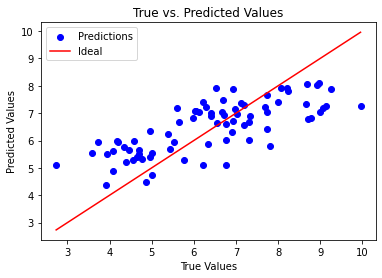

857
610
857
108
n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 10
max_resources_: 610
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 61
n_resources: 10
Fitting 5 folds for each of 61 candidates, totalling 305 fits
----------
iter: 1
n_candidates: 21
n_resources: 30
Fitting 5 folds for each of 21 candidates, totalling 105 fits
----------
iter: 2
n_candidates: 7
n_resources: 90
Fitting 5 folds for each of 7 candidates, totalling 35 fits
----------
iter: 3
n_candidates: 3
n_resources: 270
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Mean Squared Error (MSE): 0.7392789575402368
Mean Absolute Error (MAE): 0.6887295906640652
R^2 Score: 0.48234069263127666


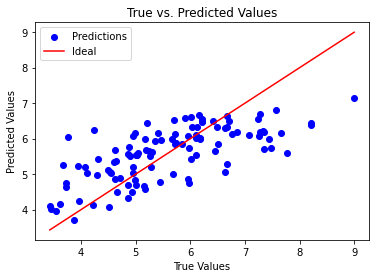

In [37]:
#built on individual Cmax model, Predict held-out test set 
import pickle
    
for column in ["median pMolar unbound plasma concentration" ,
               "median pMolar total plasma concentration"]:
    
    df_subset = train_data.dropna(subset=[column]).reset_index(drop=True)
    
    y = np.array(df_subset[column])
    features= df_subset.drop(["median pMolar total plasma concentration", 
                "median pMolar unbound plasma concentration", "protonated_Standardized_SMILES"] , axis = 1)

    feature_list = list(features.columns)
    X = np.array(features)
    
    # Split the data into training and test sets with 20% of data being used for testing.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

    print(len(X_train[0]))
    print(len(y_train))
    print(len(X_test[0]))
    print(len(y_test))

    
    # Create the random forest regressor
    rf = RandomForestRegressor(random_state=42)

    # Update the hyperparameter grid
    param_dist_grid = { 
        'max_depth': randint(5, 20),
        'max_features': randint(30, 50),
        'min_samples_leaf': randint(5, 15),
        'min_samples_split': randint(5, 15),
        'n_estimators': [200, 300, 400, 500, 600],
        'bootstrap': [True, False],
        'random_state': [42],
        'criterion': ['squared_error', 'absolute_error'],
        'n_jobs': [30]
    }

    # Using KFold instead of StratifiedKFold for regression
    inner_cv = ShuffleSplit (n_splits=5, test_size=0.2, random_state=42)

    # HalvingRandomSearchCV setup
    rsh = HalvingRandomSearchCV(estimator=rf, param_distributions=param_dist_grid,
                                factor=3, random_state=42, n_jobs=30, verbose=1,
                                cv=inner_cv, min_resources="smallest")

    # Fit the model
    rsh.fit(X_train, y_train)

    # Get the best estimator
    regressor = rsh.best_estimator_
    regressor.fit(X_train, y_train)
    
    


    # Predict on the held-out test set and NCV compounds
    y_pred = regressor.predict(X_test)
    
    # Evaluation metrics for the held-out test set
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("Mean Squared Error (MSE):", mse)
    print("Mean Absolute Error (MAE):", mae)
    print("R^2 Score:", r2)

    # If you want to visualize the true values vs. the predicted values
    import matplotlib.pyplot as plt

    plt.scatter(y_test, y_pred, color='blue', label='Predictions')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal')
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.legend()
    plt.title("True vs. Predicted Values")
    plt.show()
    
    regressor.fit(X, y)
    pickle.dump(regressor, open(f"bestlivmodel_{column}_model.sav",  'wb'))
